# Setup

In [ ]:
from google.colab import drive, auth
import sys

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pull down github repo, store in colab runtime memory
!git clone https://github.com/andrew-loeber/proj_utils_207.git

Cloning into 'proj_utils_207'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), 8.70 KiB | 890.00 KiB/s, done.


In [ ]:
# Tell Python to also look in this repo when running an import
sys.path.insert(1, "/content/proj_utils_207")

In [ ]:
# Authenticate google account and give back the session access token
auth.authenticate_user()
gcloud_token = !gcloud auth print-access-token
gcloud_token

['ya29.a0AbVbY6N6XZpfr-wNRgtNGXNkVRrXR8YVRbiW1cKXdeVXbWs9HnPyBOUtCmYwEjILUNR-9DL91Cq2F3hHfRtQab9RVo887S6Vfs6NpM8BuONzWCS3zbiGmx2YTZsBFZ6jyt_mSw7s9QuPauHpeqZwSJVZZjqIaCgYKAT8SARESFQFWKvPlcb1fXQnxuT9XDstUB47_Bg0163']

In [ ]:
from gdriveinterface import GDriveInterface
import proj_ref

In [ ]:
# Show email address, username, and the path of the shared project folder on
# your Google Drive instance
gdi = GDriveInterface(gcloud_token)
shared_folder_path = gdi.shared_folder_path
gdi.__dict__

{'email': 'aloeber@berkeley.edu',
 'account': 'aloeber',
 'shared_folder_path': '/content/drive/MyDrive/207-Project'}

In [ ]:
# Show name keys and paths for tracked files
proj_ref.files

{'taxonomy': 'BirdCLEF/eBird_Taxonomy_v2021.csv',
 'orig_metadata': 'BirdCLEF/train_metadata_with_duration.csv',
 'sample_metadata': 'data/sample_metadata.csv',
 'species_metadata': 'data/species_metadata.csv',
 'train_metadata': 'data/train_metadata.csv',
 'test_metadata': 'data/test_metadata.csv'}

In [ ]:
# Show name keys and paths for tracked directories
proj_ref.dirs

{'orig_audio': {'path': 'BirdCLEF/train_audio'},
 'train_audio': {'path': 'data/train/audio_files'},
 'test_audio': {'path': 'data/test/audio_files'},
 'train_npy_full': {'path': 'data/train/librosa_loaded'},
 'test_npy_full': {'path': 'data/test/librosa_loaded'},
 'train_npy_loud5s': {'path': 'data/train/librosa_loaded_loudest_5sec'},
 'test_npy_loud5s': {'path': 'data/test/librosa_loaded_loudest_5sec'}}

### **Usage examples**

##### Query specific file based on named key
```
command: gdi.get_file_path('taxonomy')
returns: '/content/drive/MyDrive/207-Project/BirdCLEF/eBird_Taxonomy_v2021.csv'
```

##### Query specific directory based on named key
```
command: gdi.get_dir_path('orig_audio')
returns: '/content/drive/MyDrive/207-Project/BirdCLEF/train_audio'
```

##### Query specific sample record based on named keys for directory and file
```
command: gdi.get_sample_path('train_audio', 'barswa/XC132406.ogg')
returns: '/content/drive/MyDrive/207-Project/data/train/audio_files/barswa/XC132406.ogg'
```

##### Provide full path given a custom partial path
```
command: gdi.join_to_shared('images/sandpiper.jpeg')
returns: '/content/drive/MyDrive/207-Project/images/sandpiper.jpeg'
```


# Load species metadata file

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
species_metadata = pd.read_csv(gdi.get_file_path('species_metadata'))
species_metadata

,primary_label,scientific_name,common_name,species_rank,species_total_files,species_train_files,species_test_files,species_total_duration_hrs,species_train_duration_hrs,species_test_duration_hrs,total_files,train_files,test_files,total_duration_hrs,train_duration_hrs,test_duration_hrs,class_weight_file,class_weight_duration,class_weight_combined
0,thrnig1,Luscinia luscinia,Thrush Nightingale,0,499,349,150,17.078735,10.739077,6.339658,4680,3278,1402,71.689209,49.463144,22.226065,0.937876,0.419757,0.627439
1,wlwwar,Phylloscopus trochilus,Willow Warbler,1,499,350,149,9.310583,6.733451,2.577132,4680,3278,1402,71.689209,49.463144,22.226065,0.937876,0.769975,0.849789
2,eaywag1,Motacilla flava,Western Yellow Wagtail,2,498,348,150,4.649309,3.229026,1.420284,4680,3278,1402,71.689209,49.463144,22.226065,0.939759,1.541932,1.203763
3,comsan,Actitis hypoleucos,Common Sandpiper,3,497,349,148,4.297684,2.864329,1.433354,4680,3278,1402,71.689209,49.463144,22.226065,0.941650,1.668090,1.253298
4,barswa,Hirundo rustica,Barn Swallow,4,496,347,149,5.308204,3.632351,1.675853,4680,3278,1402,71.689209,49.463144,22.226065,0.943548,1.350536,1.128847
5,woosan,Tringa glareola,Wood Sandpiper,5,474,332,142,3.730303,2.704072,1.026231,4680,3278,1402,71.689209,49.463144,22.226065,0.987342,1.921806,1.377490
6,combuz1,Buteo buteo,Common Buzzard,6,473,332,141,6.874921,4.634755,2.240165,4680,3278,1402,71.689209,49.463144,22.226065,0.989429,1.042764,1.015747
7,hoopoe,Upupa epops,Eurasian Hoopoe,7,419,293,126,6.955822,5.174239,1.781583,4680,3278,1402,71.689209,49.463144,22.226065,1.116945,1.030636,1.072923
8,eubeat1,Merops apiaster,European Bee-eater,8,417,292,125,7.826683,5.648654,2.178028,4680,3278,1402,71.689209,49.463144,22.226065,1.122302,0.915959,1.013895
9,cohmar1,Delichon urbicum,Common House-Martin,9,408,286,122,5.656965,4.103189,1.553775,4680,3278,1402,71.689209,49.463144,22.226065,1.147059,1.267273,1.205669


In [ ]:
colors = [
    '#ab63fa'
    ,'#00cc96'
    ,'#ffa15a'
    ,'#636efa'
    ,'#ef553b'
    ,'#a5abf8'
    ,'#19d3f3'
    ,'#ff6692'
    ,'#b6e880'
    ,'#ffb2a5'
]


[Text(0, 0.5, '')]

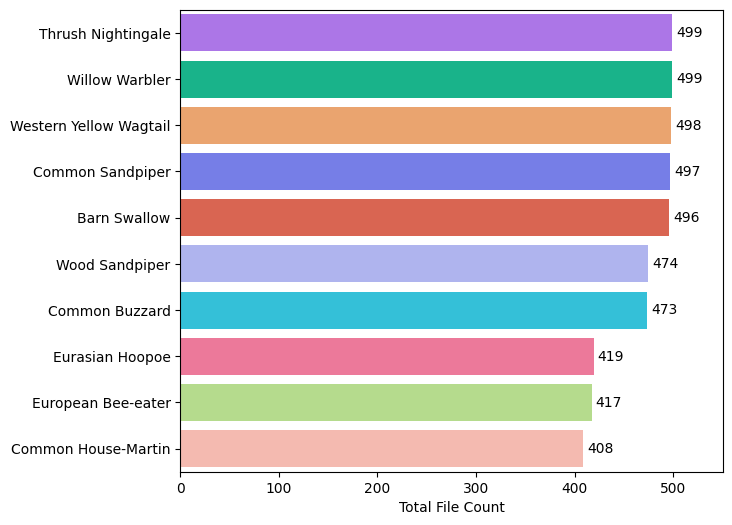

In [ ]:
plt.figure(figsize=(7,6))
ax = sns.barplot(
    data=species_metadata
    , x='species_total_files'
    , y='common_name'
    , hue_order='species_rank'
    , palette=colors
)
ax.bar_label(ax.containers[0], fmt='%i', padding=3)
ax.set(xlabel='Total File Count')
ax.set(xlim=[0,550])
ax.set(ylabel=None)

[Text(0, 0.5, '')]

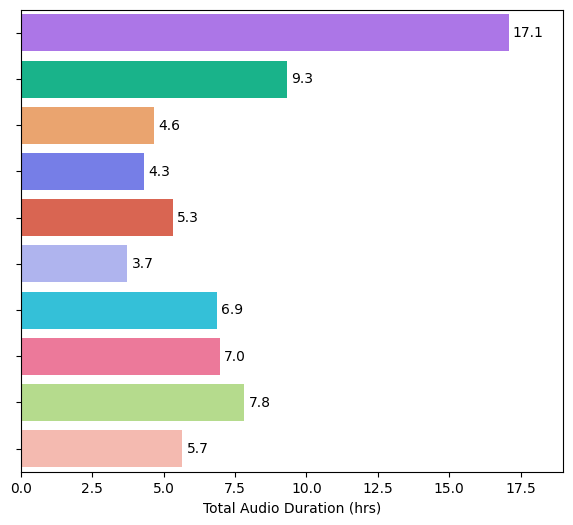

In [ ]:
plt.figure(figsize=(7,6))
ax = sns.barplot(
    data=species_metadata
    , x='species_total_duration_hrs'
    , y='common_name'
    , hue_order='species_rank'
    , palette=colors
)
ax.bar_label(ax.containers[0], fmt='%.1f', padding=3)
ax.set(xlabel='Total Audio Duration (hrs)')
ax.set(yticklabels=[])
ax.set(xlim=[0,19])
ax.set(ylabel=None)